In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. 데이터 로드 및 전처리
df = pd.read_csv('C:/dataset/abalone.csv')

In [3]:
# Sex 원-핫 인코딩
df = pd.get_dummies(df, columns=['Sex'])

In [4]:
# 특성과 타겟 분리
X = df.drop(['Rings', 'id'], axis=1)
y = df['Rings']

In [5]:
# 스케일링
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [6]:
# LSTM 입력을 위한 reshape
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [7]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_scaled, test_size=0.2, random_state=42
)

In [8]:
# 2. LSTM 모델 구성
model = Sequential([
    # LSTM 레이어
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    
    LSTM(64),
    BatchNormalization(),
    Dropout(0.2),
    
    # Dense 레이어
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

C:\Users\김경환\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# 3. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [10]:
# 4. 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 1.1590 - mae: 0.8282 - val_loss: 0.7946 - val_mae: 0.6486
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6985 - mae: 0.6262 - val_loss: 0.7458 - val_mae: 0.6232
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5844 - mae: 0.5648 - val_loss: 0.6606 - val_mae: 0.5857
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5794 - mae: 0.5558 - val_loss: 0.5911 - val_mae: 0.5360
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5674 - mae: 0.5477 - val_loss: 0.5182 - val_mae: 0.5071
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5411 - mae: 0.5373 - val_loss: 0.4786 - val_mae: 0.4787
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5173 - mae: 0.5126 - val_loss: 0.4116 - val_mae: 0.4573
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5086 - mae: 0.5221 - val_loss: 0.3960 - val_mae: 0.4281
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - lo

In [11]:
# 5. 모델 평가
y_pred_scaled = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 


In [12]:
# 예측값을 원래 스케일로 변환
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)

# 성능 지표 계산
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

MSE: 4.4700
RMSE: 2.1142
R2 Score: 0.5871


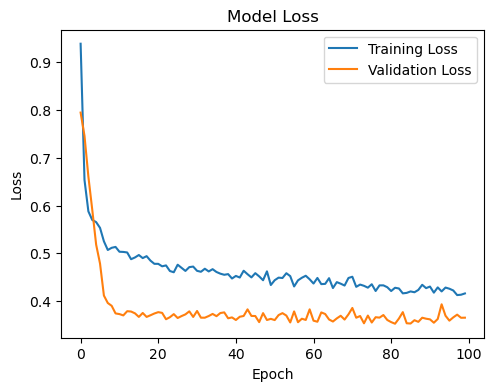

In [13]:
# 6. 학습 과정 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

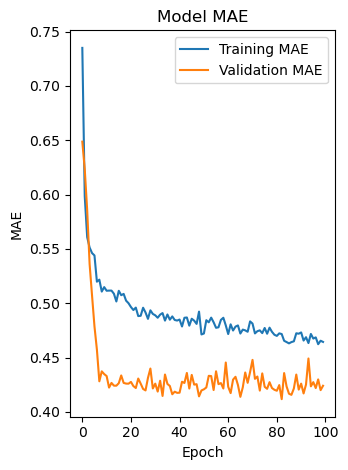

In [14]:
# MAE 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()